<p style="text-align: right;"><time datetime="2019-12-21">令和元年12月21日</time></p>
<p style="text-align: right;">北川一樹</p>
<h1 style="text-align: center;">機械学習に関するレポート</h1>

# 機械学習とは
- 定義
    - コンピュータプログラムは、タスク$T$（アプリケーションにさせたいこと）を性能指標$P$で測定し、その性能が経験$E$（データ）により改善される場合、タスク$T$および性能指標$P$に関して経験$E$から学習（汎化）すると言われている（トム・ミッチェル1997）
    - 人がプログラムするのは経験の仕方ではなく学習の仕方
- パラメータ
    - $w_0$は切片で、それ以外の$w_i$は重み付け
    - $\boldsymbol{w}$は要素数$m$のベクトル、$m=1$の場合はスカラー
$$
\begin{cases}
w_1\in\mathbb{R}^1 & (m = 1) \\
\boldsymbol{w} = 
\begin{pmatrix}
w_1 \\
w_2 \\
\vdots \\
w_m
\end{pmatrix}\in\mathbb{R}^m & (m > 1)
\end{cases}
$$
- 説明変数
    - $\boldsymbol{x}$は要素数$m$のベクトル、$m=1$の場合はスカラー
$$
\begin{cases}
x_1\in\mathbb{R}^1 & (m = 1) \\
\boldsymbol{x} = 
\begin{pmatrix}
x_1 \\
x_2 \\
\vdots \\
x_m
\end{pmatrix}\in\mathbb{R}^m & (m > 1)
\end{cases}
$$
- 目的変数
    - 回帰問題
        - $y$はスカラー
$$y\in\mathbb{R}^1$$
    - 分類問題
        - $y$は0か1
$$y\in\{0, 1\}$$
- 平均
$$\bar{x} = \frac{1}{n}\sum_{i=1}^nx_i$$
- データ行列
    - 説明変数（train）の各要素を平均で引く
$$
\bar{\mathbf{X}} =
\begin{pmatrix}
x_1 - \bar{x} \\
x_2 - \bar{x} \\
\vdots \\
x_n - \bar{x}
\end{pmatrix}
$$
- 分散共分散行列
    - データ行列を利用する
$$\Sigma = Var(\bar{\mathbf{X}}) = \frac{1}{n}\bar{\mathbf{X}}^{\mathrm{T}}\bar{\mathbf{X}}$$
- **シグモイド関数**
    - 入力値$x$はスカラー
    - 出力値$\sigma(\cdot)$は必ず0から1迄の連続値になる∴クラス1に分類される**確率として表現可能**
    - ゲイン$a$の値に応じてシグモイド関数の形が変わる
        - 通常は$a=1$
        - $a=\infty$の場合、形がステップ関数と等しくなる
    - 単調増加関数
$$\sigma(x) = \frac{1}{1 + \exp(-ax)}$$
    - 微分
        - シグモイド関数自身で表現可能
        - 簡単に微分できる形であれば、最大値又は最小値を求める際に有利
$$
\begin{eqnarray}
\frac{\partial \sigma(x)}{\partial x} &=& \frac{\partial}{\partial x}\left(\frac{1}{1 + \exp(-ax)}\right) \\
&=& (-1)\cdot\{1 + \exp(-ax)\}^{-2}\cdot\exp(-ax)\cdot(-a) \\
&=& \frac{a\exp(-ax)}{\{1 + \exp(-ax)\}^2} = \frac{a}{1 + \exp(-ax)}\cdot\frac{1 + \exp(-ax) -1}{1 + \exp(-ax)} \\
&=& a\sigma(x)(1 - \sigma(x))
\end{eqnarray}
$$
- よく使われる確率分布
    - 正規分布
    - t分布
    - ガンマ分布
    - 一様分布
    - ディリクレ分布
    - **ベルヌーイ分布**
        - 確率$p$で1、確率$1-p$で0をとる離散確率分布（例: コイン投げ）
        - ベルヌーイ分布の確率質量関数
$$P(y)=p^y(1 - p)^{1 - y}$$
        - 「生成されるデータ」は分布のパラメータによって異なる
- 同時確率
    - 或るデータが得られた際、それが同時に得られる確率
    - 確率変数は確率的に独立であることを仮定すると、各々の確率の掛け算となる
    - ベルヌーイ分布の確率質量関数の場合
$$P(y_1, y_2, \ldots, y_n; p) = \prod_{i=1}^np^{y_i}(1 - p)^{1 - y_i}$$
    - **$p$を未知のものとすると、尤度関数が求まる**
- **バッチ最急降下法**
    - パラメータ$w_0$の更新量
$$-\eta\frac{\partial L}{\partial w_0} = \eta\sum_{i=1}^n(y_i - x_i)$$
    - パラメータ$w_1$の更新量
$$-\eta\frac{\partial L}{\partial w_1} = \eta\sum_{i=1}^n(y_i - x_i)x_i$$
- **確率的勾配降下法（SGD）**
    - データを一つずつランダム（確率的）に選び学習率$\eta$を掛けたものをパラメータ$\boldsymbol{w}$に足して更新
    - パラメータ$w_0$の更新量
$$-\eta\frac{\partial L}{\partial w_0} = \eta(y_i - x_i)$$
    - パラメータ$w_1$の更新量
$$-\eta\frac{\partial L}{\partial w_1} = \eta(y_i - x_i)x_i$$
    - 特徴
        - 普通の勾配降下法のパラメータ$\boldsymbol{w}$の1回の更新と同じ計算量でパラメータを$n$回更新できる。毎回の更新でデータを一つ又は少量しか見ないので効率的
        - SGDを適用する為には目的関数のパラメータに関する勾配が計算できる必要がある
        - trainデータの順番を変えると結果も変わる可能性がある
        - 学習率$\eta$が小さ過ぎると学習に時間がかかり、局所解に陥り易い
        - 学習率$\eta$が大き過ぎるとパラメータ$\boldsymbol{w}$が発散し易い
- モメンタムありの確率的勾配降下法
    - 今回のSGD更新量$+$前回のSGD更新量に慣性項$\alpha$を掛けたもの
        - 前回のSGD更新量
$$
\left\{
\begin{array}
\,w_{i\,t} - w_{i\,t-1} \\
i\in\{0, 1\}
\end{array}
\right.
$$
    - パラメータ$w_0$の更新量
$$
-\eta\frac{\partial L}{\partial w_0} + \alpha(w_{0\,t} - w_{0\,t-1}) 
= \eta(y_i - x_i) + \alpha\eta(y_{i - 1} - x_{i - 1})
$$
    - パラメータ$w_1$の更新量
$$
-\eta\frac{\partial L}{\partial w_1} + \alpha(w_{1\,t} - w_{1\,t-1}) 
= \eta(y_i-x_i)x_i + \alpha\eta(y_{i - 1} - x_{i - 1})x_{i - 1}
$$

# データの分割
- 学習用データ（train）
    - 機械学習モデルの学習に利用するデータ
    - 学習誤差
$$MSE_{train} = \frac{1}{n_{train}}\sum_{i=1}^{n_{train}}(\hat{y}^{(train)} - y_i^{(train)})^2$$
- 検証用データ（test）
    - 学習済みモデルの精度を検証する為のデータ
    - 検証誤差
$$MSE_{test} = \frac{1}{n_{test}}\sum_{i=1}^{n_{test}}(\hat{y}^{(test)} - y_i^{(test)})^2$$
- わざわざデータを分割する目的
    - モデルの汎化性能（予測性能）を見る為
- 汎化性能
    - trainだけでなく、未知の入力データに対する予測性能
    - 検証方法
        - **ホールドアウト法**
            - testを利用して検証
            - データ数が少ないと不利
        - **交差検証（クロスバリデーション）**
            - ホールドアウト法よりも優秀な方法
            - モデルの構築と評価を複数回行う処理
                - 例えば、データを10分割（$k$分割）した場合、9つ（$k-1$）の集合をtrainに、残りの1つをtestに使用する処理を10回（$k$回）繰り返す。これを10分割交差検証（$k$分割交差検証）と称す
            - CV値が最小のモデルを選択
        - グリッドサーチ
            - 全てのチューニングパラメータ（ハイパーパラメータ）の組み合わせごとにモデルを構築して評価
    - 未学習（underfitting）
        - train誤差が大きいモデル
        - 対策
            - 表現力の高いモデルを利用
    - 過学習（overfitting）
        - train誤差が小さいがtest誤差が大きいモデル
        - trainにきっちりフィットし過ぎていて汎化性能が低い
        - 対策
            - train数を増やす
            - 不要な変数をドロップアウトし表現力を抑止
            - **正則化法**（罰則化法）を利用し表現力を抑止
                - L1ノルム（**Lasso**）
                    - スパース推定
                        - 幾つかのパラメータを正確に0に推定
                    - 不要な変数等を排除可能
                - L2ノルム（**Ridge**）
                    - 縮小推定
                        - パラメータを0に近づけるよう推定

# モデルの評価
- 混同行列（confusion matrix）
    - $tp$（True Positive、真陽性）: 正例と予測して、実際に正例だった数
    - $fp$（False Positive、偽陽性）: 正例と予測したが、実際は負例だった数
        - 確認の工数に時間がかかる
    - $fn$（False Negative、偽陰性）: 負例と予測したが、実際は正例だった数
        - 本当に検知したい脅威が見えなくなる
    - $tn$（True Negative、真陰性）: 負例と予測して、実際に負例だった数

<table><caption>混同行列</caption>
<thead>
<tr><th style="border: thin solid #ffffff; background-color: #87ceeb;" colspan="2" rowspan="2"></th><th style="border: thin solid #ffffff; background-color: #87ceeb;" colspan="2">実績</th></tr>
<tr><th style="border: thin solid #ffffff; background-color: #87ceeb;">正例</th><th style="border: thin solid #ffffff; background-color: #87ceeb;">負例</th></tr>
</thead>
<tbody>
<tr><th style="border: thin solid #ffffff; background-color: #87ceeb;" rowspan="2">予測</th><th style="border: thin solid #ffffff; background-color: #f0f0f0;">正例と予測</th><th style="border: thin solid #ffffff; background-color: #f0f0f0;">
<p style="font-size: large;"><strong>$tp$</strong></p>
<p style="font-weight: normal;">正例と予測して<br />実際に正例</p>
</th><th style="border: thin solid #ffffff; background-color: #f0f0f0;">
<p style="font-size: large;"><strong>$fp$</strong></p>
<p style="font-weight: normal;">正例と予測したが<br />実際は負例</p>
</th></tr>
<tr><th style="border: thin solid #ffffff; background-color: #c0c0c0;">負例と予測</th><th style="border: thin solid #ffffff; background-color: #c0c0c0;">
<p style="font-size: large;"><strong>$fn$</strong></p>
<p style="font-weight: normal;">負例と予測したが<br />実際は正例</p>
</th><th style="border: thin solid #ffffff; background-color: #c0c0c0;">
<p style="font-size: large;"><strong>$tn$</strong></p>
<p style="font-weight: normal;">負例と予測して<br />実際に負例</p>
</th></tr>
</tbody>
</table>

- 評価方法
    - 正解率（Accuracy）
        - 正解した数$\div$予測対象の全データ数
        - データに偏りがある場合、問題がある
$$A = \frac{tp + tn}{tp + fn + fp + tn}$$
    - 再現率（Recall）
        - 正例と予測して、実際に正例だった数$\div$実際正例だった数
        - 適合率とトレードオフ
        - $fp$が多少多くても抜け漏れは少ない際に利用。例えば、実際は癌であるのに癌ではないと誤診することを避けたいタスク
$$R = \frac{tp}{tp + fn}$$
    - 適合率（Precision）
        - 正例と予測して、実際に正例だった数$\div$正例と予測した数
        - 再現率とトレードオフ
        - 見逃し（$fn$）が多くても正確な予測をしたい際に利用。例えば、上司からの重要なメールをスパムメールと誤判別されるのを避けたいタスク
$$P = \frac{tp}{tp + fp}$$
    - F値
        - 適合率と再現率の調和平均
        - タスクの特性が不明瞭な場合に使用
$$F = \frac{2}{\frac{1}{P} + \frac{1}{R}} = \frac{2PR}{P + R}$$

# 線形回帰
- 教師あり学習の回帰手法
- $m$次元の未知の重み付け（パラメータ$\boldsymbol{w}$）と$m$次元の入力ベクトル（説明変数$\boldsymbol{x}$）の**線形結合**（内積$+$切片）をスカラーの目的変数$y$として出力するモデル
- **最小二乗法**によりパラメータ$\boldsymbol{w}$を推定
    - 最小二乗法
        - $y_{train}$とモデルの出力値$y$の二乗誤差を最小化すること
- 入力
    - 各要素を説明変数又は特徴量と呼ぶ。
    - 要素数を$m$とする。
        - $m=1$の場合はスカラーで表現し、**単回帰**と称す
        - $m>1$の場合はベクトルで表現し、**重回帰**と称す
$$
\begin{cases}
x_1\in\mathbb{R}^1 & (m = 1) \\
\boldsymbol{x} = 
\begin{pmatrix}
x_1 \\
x_2 \\
\vdots \\
x_m
\end{pmatrix}\in\mathbb{R}^m & (m > 1)
\end{cases}
$$
- 出力
    - 目的変数、スカラー
$$y\in\mathbb{R}^1$$
- 特徴
    - 訓練データが多いほど表現力が上がり、過学習が起き難い
    - 外れ値に敏感
    - 説明変数間に相関があると良い推定ができない可能性がある
    - モデルの表現力を下げた方が良い場合もある
    - モデルの表現力が大きくなると、バイアスは小さくなるがバリアンスは大きくなる
	    - バイアスとバリアンスはトレードオフ
- 学習と予測
    - 線形単回帰モデル
        - 説明変数が1次元（$m=1$）
        - データは回帰直線に誤差$\varepsilon$が加わり観測されていると仮定
        - パラメータ$w_0$は切片に相当
        - パラメータ$w_1$は回帰係数に相当
        - モデル数式
$$y = w_0 + w_1x_1 + \varepsilon$$
        - 複数のデータをモデル数式に当てはめると連立方程式が導出される
$$
y_1 = w_0 + w_1x_1 + \varepsilon_1 \\
y_2 = w_0 + w_1x_2 + \varepsilon_2 \\
\vdots \\
y_n = w_0 + w_1x_n + \varepsilon_n
$$
    - 線形重回帰モデル
        - 説明変数が多次元（$m>1$）
        - パラメータ$w_0$は切片に相当
        - パラメータ$w_i (i > 0)$は回帰係数に相当
        - データは回帰曲面に誤差$\varepsilon$が加わり観測されていると仮定
        - モデル数式
$$
\begin{eqnarray}
y &=& w_0 + \sum_{i=1}^nw_ix_i+\varepsilon \\
&=& w_0 + w_1x_1 + w_2x_2 + \ldots + w_nx_n + \varepsilon
\end{eqnarray}
$$
        - パラメータ$\boldsymbol{w}$と説明変数$\boldsymbol{x}$の線形結合
$$
\begin{eqnarray}
\hat{y} &=& \boldsymbol{w}^{\mathrm{T}}\boldsymbol{x} + w_0 \\
&=& \sum_{j=1}^mw_jx_j + w_0
\end{eqnarray}
$$
        - **回帰係数$w$の推定は最小二乗法による解と最尤法による解が一致**

# 非線形回帰
- 教師あり学習の回帰手法
- 線形回帰モデルの手法に更に基底関数を混ぜて線形結合する**基底展開法**を使用
    - 未知のパラメータ$w$は線形回帰モデルと同様に最小二乗法や最尤法により推定
$$y_i = w_0 + \sum_{i=1}^mw_j\phi_j(x_i)+\varepsilon_i$$
- よく使われる基底関数
    - 多項式関数
$$\phi_j = x^j$$
    - ガウス型基底関数
$$\phi_j(x) = \exp\left\{\frac{(x - \mu_j)^2}{2h_j}\right\}$$
    - 2次元ガウス型基底関数
$$\phi_j(x) = \exp\left\{\frac{(x - \mu_j)^{\mathrm{T}}(x - \mu_j)}{2h_j}\right\}$$
    - スプライン関数
- 基底展開法も線形回帰と同じ枠組みで推定可能

# ロジスティック回帰
- 教師あり学習の**分類**手法
- パラメータ$\boldsymbol{w}$と説明変数$\boldsymbol{x}$の線形結合をシグモイド関数$\sigma(\cdot)$に入力
$$\sigma\left(\sum_{j=1}^mw_jx_j + w_0\right)$$
- 説明変数$\boldsymbol{x}$が与えられた際に$Y=1$となる確率
$$P(Y=1\mid \boldsymbol{x})$$
    - シグモイド関数と対応
$$P(Y=1\mid \boldsymbol{x}) = \sigma\left(\sum_{j=1}^mw_jx_j + w_0\right)$$
- クラス0かクラス1への分類は**ベルヌーイ分布**に準拠
    - **説明変数$\boldsymbol{x}$が与えられた際に$Y=\{0,1\}$となる確率のベクトル**
$$
\boldsymbol{y}_{proba}
=
\begin{pmatrix}
P(Y=0\mid \boldsymbol{x}) \\
P(Y=1\mid \boldsymbol{x})
\end{pmatrix}
=
\begin{pmatrix}
1 - \sigma\left(\sum_{j=1}^mw_jx_j + w_0\right) \\
\sigma\left(\sum_{j=1}^mw_jx_j + w_0\right)
\end{pmatrix}
$$
- 学習
    - 確率分布はベルヌーイ分布を利用
    - **最尤推定**によりパラメータ$\boldsymbol{w}$を推定
        - 最尤推定
            - 尤度関数の最大化
            - $\boldsymbol{w}$→$p$→確率$P$の順に求まる
$$
P(Y=y_1\mid x_1) = p_1^{y_1}(1 - p_1)^{1 - y_1} = \sigma(\boldsymbol{w}^{\mathrm{T}}x_1)^{y_1}(1-\sigma(\boldsymbol{w}^{\mathrm{T}}x_1))^{1-y_1} \\
P(Y=y_2\mid x_2) = p_2^{y_2}(1 - p_2)^{1 - y_2} = \sigma(\boldsymbol{w}^{\mathrm{T}}x_2)^{y_2}(1-\sigma(\boldsymbol{w}^{\mathrm{T}}x_2))^{1-y_2} \\
\vdots \\
P(Y=y_n\mid x_n) = p_1^{y_n}(1 - p_n)^{1 - y_n} = \sigma(\boldsymbol{w}^{\mathrm{T}}x_n)^{y_n}(1-\sigma(\boldsymbol{w}^{\mathrm{T}}x_n))^{1-y_n}
$$
    - **尤度関数$L(\cdot)$を最大**とする未知のパラメータ$\boldsymbol{w}$を探索
        - ベルヌーイ分布の確率質量関数の同時確率を利用
$$
\begin{eqnarray}
P(y_1, y_2, \ldots, y_n \mid w_1, w_2, \ldots, w_n) &=& \prod_{i=1}^n p_i^{y_i} (1 - p_i)^{1-y_i}  \\
&=& \prod_{i=1}^n \sigma(\boldsymbol{w}^{\mathrm{T}}x_i)^{y_i}(1 - \sigma(\boldsymbol{w}^{\mathrm{T}}x_i))^{1-y_i} \\
&=& L(\boldsymbol{w})
\end{eqnarray}
$$
    - **尤度関数が最大となる点と対数尤度関数が最大となる点が一致**する性質を利用
        - 対数をとることで微分の計算が簡単になる
        - 最小二乗法の最小化と合わせる為、尤度関数にマイナスを掛けたものを$E(\cdot)$とし、最大化問題を最小化問題とする
$$
\begin{eqnarray}
E(w_0, w_1, \ldots, w_m) &=& -\log L(w_0, w_1, \ldots, w_m)  \\
&=& \sum_{i=1}^n\{y_i\log p_i+(1-y_i)\log (1-p_i)\}
\end{eqnarray}
$$
- 特徴
    - 表現力の高いモデルに対して正則化すると決定境界は滑らかになる
    - 訓練データが多いほど表現力が上がり、過学習が起き難い

# 主成分分析
- 教師なし学習
- 次元圧縮　高次元の情報の損失をなるべく小さくなるように低次元化する
- 線形変換後のベクトル
    - 主成分ではパラメータ$\boldsymbol{a}$とする
    - $j$を軸の添え字とする
- 線形変換後の変数の分散が最大となる射影軸を探索
$$
\boldsymbol{s}_j=
\begin{pmatrix}
s_{1j} \\
s_{2j} \\
\vdots \\
s_{nj}
\end{pmatrix}
=\bar{X}\boldsymbol{a}_j\in\mathbb{R}^m
$$
- 線形変換後の分散
    - 書き下すと、データ行列$\bar{X}$とその転置行列$\bar{X}^{\mathrm{T}}$の計算式が現れる
$$
\begin{eqnarray}
Var(\boldsymbol{s}_j) &=& \frac{1}{n}\boldsymbol{s}_j^{\mathrm{T}}\boldsymbol{s}_j \\
&=& \frac{1}{n}(\bar{X}\boldsymbol{a}_j)^{\mathrm{T}}(\bar{X}\boldsymbol{a}_j) \\
&=& \frac{1}{n}\boldsymbol{a}_j^{\mathrm{T}}\bar{X}^{\mathrm{T}}\bar{X} \\
&=& \boldsymbol{a}_j^{\mathrm{T}}Var(\bar{X})\boldsymbol{a}_j
\end{eqnarray}
$$
- 学習
    - ノルムが1となる制約を入れ、最適化問題を解く
    - 目的関数
$$\arg \max (\boldsymbol{a}_j^{\mathrm{T}})Var(\bar{X})\boldsymbol{a}_j\in\mathbb{R}^m$$
    - 制約条件
$$(a_j^{\mathrm{T}})a_j = 1$$
    - 解き方
        - ラグランジュ関数$E(\cdot)$を微分して0になる点を探索
        - 制約条件をラグランジュ乗数とする
$$E(\boldsymbol{a}_j) = a_j^{\mathrm{T}}Var(\bar{X})\boldsymbol{a}_j - \lambda(\boldsymbol{a}_j^{\mathrm{T}}\boldsymbol{a}_j - 1)$$
        - $E(\boldsymbol{a}_j)$を$a$で偏微分
$$\frac{\partial E(\boldsymbol{a}_j)}{\partial \boldsymbol{a}_j} = 2Var(\bar{X})a_j - 2\lambda \boldsymbol{a}_j = 0$$
- 特徴
    - 解は分散共分散行列の**固有値**と**固有ベクトル**
$$Var(\bar{X})a_j = \lambda \boldsymbol{a}_j$$
    - **射影先の分散は固有値と一致**
$$
\begin{eqnarray}
Var(\boldsymbol{s}_1) &=& \boldsymbol{a}_1^{\mathrm{T}}Var(\bar{X})a_1 \\
&=& \lambda_1\boldsymbol{a}_1^{\mathrm{T}}\boldsymbol{a}_1 \\
&=& \lambda_1
\end{eqnarray}
$$
    - 固有値は必ず**0以上**かつ固有ベクトルは**直行**
        - 例えば固有値を2つ求めた場合、それぞれ第1主成分、第2主成分と称す
    - 元データの総分散は主成分の総分散に等しい
$$V_{total} = \sum_{i=1}^m\lambda_i$$
- 寄与率
    - 次元圧縮した際の第$k$主成分が持つ情報量の割合
    - 第$k$主成分の分散$\div$主成分の総分散
$$c_k = \frac{\lambda_k}{\sum_{i=1}^m\lambda_i}$$
- 累積寄与率
    - 第1-$k$主成分迄次元圧縮した際の情報損失量の割合
    - 第1-$k$主成分の分散$\div$主成分の総分散
$$r_k = \frac{\sum_{j=1}^k\lambda_j}{\sum_{i=1}^m\lambda_i}$$

# k近傍法（k-NN）
- 教師あり学習の分類手法
- アルゴリズム
    - 最近傍のデータを$k$個取ってきて多数決をとり、それらが最も多く所属するクラスに識別
- $k$はチューニングパラメータ

# k平均法（k-means）
- 教師なし学習のクラスタリング手法
- 与えられたデータをk個のクラスタに分類する
- $k$はチューニングパラメータ
- アルゴリズム
    1. 各クラスタ中心の初期値を設定する
        - k-means++では初期値をランダムに与える
    1. 各データ点に対して、各クラスタ中心との距離を計算して距離が近いクラスタを割り当てる
    1. 各クラスタの平均ベクトル（中心）を計算する
    1. 収束するまで2,3を繰り返す

# サポートベクターマシン（SVM）
- 教師あり学習
- 線形モデルの**正負**で2値分類
    - パラメータ$\boldsymbol{w}$、説明変数$\boldsymbol{x}$、切片$b$で線形結合したものを符号関数$sign(\cdot)$に入力
$$
sign\left(\sum_{j=1}^mw_jx_j + b\right) =
\begin{cases}
+1 & (y > 0) \\
-1 & (y < 0)
\end{cases}
$$
    - 決定境界はいくつも考えられる
- 学習
    - マージンが最大となる直線（線形判別関数）を探索
$$\max_{\boldsymbol{w},b}[\min_{i}\frac{t_i\left(\sum_{j=1}^mw_jx_j + b\right)}{\|\boldsymbol{w}\|}]$$
        - マージン
            - 決定境界から最近傍データ迄のユークリッド距離
$$\min_{i}\frac{t_i\left(\sum_{j=1}^mw_jx_j + b\right)}{\|\boldsymbol{w}\|}$$
            - マージン上のデータはサポートベクター（サポートベクトル）
                - 予測に影響を与える
$$t_i\left(\sum_{j=1}^mw_jx_j + b - 1\right) = 0$$
            - 目的関数
$$\max_{\boldsymbol{w},b}\frac{1}{\|\boldsymbol{w}\|}$$
            - チューニングパラメータ**C**によるマージンの大きさ調整
                - ソフトマージンSVMでよく使われる
                - Cの値を大きくした場合
                    - マージンが小さくなる
                    - 誤分類に狭量になる
                    - 汎化性能が小さくなる
                    - 過学習が起き易くなる
                - Cの値を小さくした場合
                    - マージンが大きくなる
                    - 誤分類に寛容になる
                    - 汎化性能が大きくなる
                    - 過学習が起き難くなる
    - 線形分離を試行
        - 線形分離不可能な場合は非線形カーネルによって特徴空間に写像して分離（**カーネルトリック**）
            - 主な非線形カーネル
                - 動径基底関数（rbf）カーネル
$$k(\boldsymbol{x}_i, \boldsymbol{x}_j) = \exp(-\frac{\|\boldsymbol{x}_i-\boldsymbol{x}_j\|^2}{2\sigma^2})$$
                - 多項式カーネル
                - シグモイドカーネル
- 特徴
    - 外れ値検出にも使える
    - 決定的な出力を行う

# ハンズオン

## 線形回帰モデル-Boston Hausing Data-
- 設定
    - ボストンの住宅データセットを線形回帰モデルで分析
    - 適切な査定結果が必要
        - 高過ぎても安過ぎても会社に損害がある
- 課題
    - 部屋数が4で犯罪率が0.3の物件はいくらになるか？

|||
|:-:|:-:|
|データセット名|ボストンの住宅データセット（ボストン市の住宅価格）|
|レコード数|506|
|カラム数|14|
|詳細|[UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/): Housing Data Set|
|備考|よく線形回帰モデルのテストセットとして使用される|

|項番|変数|記号名|備考|
|:-:|:-:|:-:|:-:|
|1|犯罪発生率|CRIM|(人口単位)|
|2|25000平方フィート以上の住宅区間の割合|ZN||
|3|非小売業の土地面積の割合|INDUS|(人口単位)|
|4|チャールズ川沿いかどうかフラグ|CHAS|(川沿いなら`1`、そうでなければ`0`)|
|5|窒素感化物の濃度|NOX|(pphm単位)|
|6|一戸あたりの平均部屋数|RM|`2`,`3`など (単位は部屋)|
|7|1940年よりも前に建てられた家屋の割合|AGE||
|8|ボストンの主な5つの雇用圏迄の重み付き距離|DIS||
|9|幹線道路へのアクセス指数|RAD||
|10|10000ドルあたりの所得税率|TAX||
|11|教師あたりの生徒の数|PTRATIO|(人口単位)|
|12|$1000(Bk-0.63)^2$として計算される量|B|Bkはアフリカ系アメリカ人居住者の割合 (人口単位)|
|13|低所得者の割合|LSTAT||
|14|住宅価格|PRICE|中央値 (単位は1000ドル)|

### 必要モジュールとデータのインポート

In [1]:
# from モジュール名 import クラス名（もしくは関数名や変数名）
from sklearn.datasets import load_boston
from pandas import DataFrame
import numpy as np

In [2]:
# ボストンデータを"boston"というインスタンスにインポート
boston = load_boston()

In [3]:
# インポートしたデータを確認(data / target / feature_names / DESCR)
print(boston)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [4]:
# DESCR変数の中身を確認
print(boston['DESCR'])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [5]:
# feature_names変数の中身を確認
# カラム名
print(boston['feature_names'])

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [6]:
# data変数(説明変数)の中身を確認
print(boston['data'])

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [7]:
# target変数(目的変数)の中身を確認
print(boston['target'])

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

### データフレームの作成

In [8]:
#　説明変数らをDataFrameへ変換
df = DataFrame(data=boston.data, columns = boston.feature_names)

In [9]:
# 目的変数をDataFrameへ追加
df['PRICE'] = np.array(boston.target)

In [10]:
# 最初の5行を表示
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### 線形単回帰分析

In [11]:
# 説明変数の記号名: [一戸あたりの平均部屋数]
x_keys = ['RM']
x_keys

['RM']

In [12]:
# カラムを指定してデータを表示
df[x_keys].head()

,RM
0,6.575
1,6.421
2,7.185
3,6.998
4,7.147


In [13]:
# 説明変数
data = df.loc[:, x_keys].values

In [14]:
# dataリストの表示(1-5)
data[0:5]

array([[6.575],
       [6.421],
       [7.185],
       [6.998],
       [7.147]])

In [15]:
# 目的変数
target = df.loc[:, 'PRICE'].values

In [16]:
## sklearnモジュールからLinearRegressionをインポート
from sklearn.linear_model import LinearRegression

In [17]:
# オブジェクト生成
model = LinearRegression()
#model.get_params()
#model = LinearRegression(fit_intercept = True, normalize = False, copy_X = True,  n_jobs = 1)

In [18]:
# fit関数でパラメータ推定
model.fit(data, target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
# 予測
model.predict(1)

array([-25.5685118])

### 重回帰分析(2変数)

In [20]:
# 説明変数の記号名: [犯罪発生率,一戸あたりの平均部屋数]
x_keys = ['CRIM', 'RM']
x_keys

['CRIM', 'RM']

In [21]:
# カラムを指定してデータを表示
df[x_keys].head()

,CRIM,RM
0,0.00632,6.575
1,0.02731,6.421
2,0.02729,7.185
3,0.03237,6.998
4,0.06905,7.147


In [22]:
# 説明変数
data2 = df.loc[:, x_keys].values
# 目的変数
target2 = df.loc[:, 'PRICE'].values

In [23]:
# オブジェクト生成
model2 = LinearRegression()

In [24]:
# fit関数でパラメータ推定
model2.fit(data2, target2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [25]:
model2.predict([[0.2, 7]])

array([29.42867599])

### 回帰係数と切片の値を確認

In [26]:
# 単回帰の回帰係数と切片を出力
print('推定された回帰係数: %.3f, 推定された切片 : %.3f' % (model.coef_, model.intercept_))

推定された回帰係数: 9.102, 推定された切片 : -34.671


In [27]:
# 重回帰の回帰係数と切片を出力
print(model2.coef_)
print(model2.intercept_)

[-0.2618229  8.3975317]
-29.30168134674115


### 課題
部屋数が`4`で犯罪率が`0.3`の物件はいくらになるか？

In [28]:
# 部屋数が4で犯罪率が0.3の物件を説明変数に指定
vec_x = np.array([0.3, 4])
vec_x

array([0.3, 4. ])

- パラメータ$\boldsymbol{w}$と説明変数$\boldsymbol{x}$の線形結合
$$
\begin{eqnarray}
\hat{y} &=& \boldsymbol{w}^{\mathrm{T}}\boldsymbol{x} + w_0 \\
&=& \sum_{j=1}^mw_jx_j + w_0
\end{eqnarray}
$$

In [29]:
# パラメータと説明変数の線形結合
# model2.predict([vec_x])[0] と等価
hat_y = model2.coef_ @ vec_x + model2.intercept_
hat_y

4.209898594060679

In [30]:
import locale
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')
print('∴ 部屋数が{rm:d}で犯罪率が{crim:.1f}の物件は{price:s}と予測しました。'.format( \
                                            rm=int(vec_x[1]), \
                                            crim=vec_x[0], \
                                            price=locale.currency(hat_y * 1000, grouping=True)))

∴ 部屋数が4で犯罪率が0.3の物件は$4,209.90と予測しました。


## ロジスティック回帰
- 設定
    - タイタニックの乗客データを利用しロジスティック回帰モデルを作成
    - 特徴抽出を試みる
- 課題
    - 年齢が30歳で男の乗客は生き残れるか？

|||
|:-:|:-:|
|データセット名|タイタニックデータ|
|レコード数|891/471|
|カラム数|11|
|詳細|Kaggle|
|備考|分類アルゴリズムでよく利用される|

|順番|変数|記号名|値|欠損値|
|:-:|:-:|:-:|:-:|:-:|
|1|PassengerId|乗客ID|`1`,`2` ...|-|
|2|Survived|生存・死者情報|`1`-> 生存者(Alive) / `0`-> 死者(Dead)|-|
|3|Pclass|乗客の社会階級|`1`(High) / `2`(Middle) / `3`(Low)|-|
|4|Name|乗客名|-|-|
|5|Sex|性別|男性:`male`/ 女性:`female`|-|
|6|Age|年齢|`22.0`/`38.0`など|$\exists$|
|7|SibSp|兄弟および配偶者の数|`0`/`1`/`2`など|-|
|8|Parch|親もしくは子供の数|`0`/`1`など|-|
|9|Ticket|チケットNo|`A/5 21171`など|-|
|10|Fare|運賃|`7.2500`など|-|
|11|Cabin|船室|`C85`など|$\exists$|
|12|Embarked|乗船した港（3つ）|`C`: Cherbourg, `Q`: Queenstown, `S`: Southampton|-|

In [31]:
# from モジュール名 import クラス名（もしくは関数名や変数名）
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# matplotlibをinlineで表示するためのおまじない (plt.show()しなくていい)
%matplotlib inline

In [32]:
# titanic data csvファイルの読み込み
titanic_df = pd.read_csv('./study_ai_ml/data/titanic_train.csv')

In [33]:
# ファイルの先頭部を表示し、データセットを確認する
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 不要なデータの削除・欠損値の補完

In [34]:
# 予測に使用するカラムを選択
# white list
usable_keys = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
usable_keys

['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

In [35]:
# 予測に不要と考えるカラムを抽出
# black list
unusable_keys = [x for x in titanic_df.columns.values if not x in usable_keys]
unusable_keys

['PassengerId', 'Name', 'Ticket', 'Cabin']

In [36]:
# 予測に不要と考えるカラムをドロップ
titanic_df.drop(unusable_keys, axis=1, inplace=True)

# 一部カラムをドロップしたデータを表示
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [37]:
# nullを含んでいる行を表示
titanic_df[titanic_df.isnull().any(1)].head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
5,0,3,male,NaN,0,0,8.4583,Q
17,1,2,male,NaN,0,0,13.0000,S
19,1,3,female,NaN,0,0,7.2250,C
26,0,3,male,NaN,0,0,7.2250,C
28,1,3,female,NaN,0,0,7.8792,Q
29,0,3,male,NaN,0,0,7.8958,S
31,1,1,female,NaN,1,0,146.5208,C
32,1,3,female,NaN,0,0,7.7500,Q
36,1,3,male,NaN,0,0,7.2292,C
42,0,3,male,NaN,0,0,7.8958,C


In [38]:
# Ageカラムのnullを平均値で補完したAgeFillカラムを追加
titanic_df['AgeFill'] = titanic_df['Age'].fillna(titanic_df['Age'].mean())

# 再度nullを含んでいる行を表示 (Ageのnullは補完されている)
titanic_df[titanic_df.isnull().any(1)]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeFill
5,0,3,male,NaN,0,0,8.4583,Q,29.699118
17,1,2,male,NaN,0,0,13.0000,S,29.699118
19,1,3,female,NaN,0,0,7.2250,C,29.699118
26,0,3,male,NaN,0,0,7.2250,C,29.699118
28,1,3,female,NaN,0,0,7.8792,Q,29.699118
29,0,3,male,NaN,0,0,7.8958,S,29.699118
31,1,1,female,NaN,1,0,146.5208,C,29.699118
32,1,3,female,NaN,0,0,7.7500,Q,29.699118
36,1,3,male,NaN,0,0,7.2292,C,29.699118
42,0,3,male,NaN,0,0,7.8958,C,29.699118


### チケット価格から生死を判別

In [39]:
# 運賃だけのリストを作成
data1 = titanic_df.loc[:, ['Fare']].values
data1

array([[  7.25  ],
       [ 71.2833],
       [  7.925 ],
       [ 53.1   ],
       [  8.05  ],
       [  8.4583],
       [ 51.8625],
       [ 21.075 ],
       [ 11.1333],
       [ 30.0708],
       [ 16.7   ],
       [ 26.55  ],
       [  8.05  ],
       [ 31.275 ],
       [  7.8542],
       [ 16.    ],
       [ 29.125 ],
       [ 13.    ],
       [ 18.    ],
       [  7.225 ],
       [ 26.    ],
       [ 13.    ],
       [  8.0292],
       [ 35.5   ],
       [ 21.075 ],
       [ 31.3875],
       [  7.225 ],
       [263.    ],
       [  7.8792],
       [  7.8958],
       [ 27.7208],
       [146.5208],
       [  7.75  ],
       [ 10.5   ],
       [ 82.1708],
       [ 52.    ],
       [  7.2292],
       [  8.05  ],
       [ 18.    ],
       [ 11.2417],
       [  9.475 ],
       [ 21.    ],
       [  7.8958],
       [ 41.5792],
       [  7.8792],
       [  8.05  ],
       [ 15.5   ],
       [  7.75  ],
       [ 21.6792],
       [ 17.8   ],
       [ 39.6875],
       [  7.8   ],
       [ 76.

In [40]:
# 生死フラグのみのリストを作成
#label1 =  titanic_df.loc[:,["Survived"]].values
label1 =  titanic_df.loc[:, 'Survived'].values
label1

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
model = LogisticRegression()

In [43]:
model.fit(data1, label1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [44]:
model.predict(61)

array([0], dtype=int64)

In [45]:
model.predict(62)

array([1], dtype=int64)

In [46]:
model.predict_proba(61)

array([[0.50345564, 0.49654436]])

In [47]:
model.predict_proba(62)

array([[0.49968899, 0.50031101]])

- 運賃61の人は死亡(0)し、運賃62の人は生存(1)したと推定される。
- だが、運賃61の人、運賃62の人の各々の死亡率、生存率を見ると、ほぼ差がないことが判る。

### 2変数から生死を判別
- 社会的階級の高い女性が生き残り易いという仮説を検証する
    - 社会的階級(`1`, `2`, `3`)と男女(`1`, `0`) を足し合わせた特徴量を作り、社会的階級の高い女性(1+0=`1`)の生存判定を見る

In [48]:
# 性別カラムを元に、female=0、male=1の整数で表現したGenderカラムを追加
titanic_df['Gender'] = titanic_df['Sex'].map({'female': 0, 'male': 1}).astype(int)
titanic_df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeFill,Gender
0,0,3,male,22.0,1,0,7.2500,S,22.0,1
1,1,1,female,38.0,1,0,71.2833,C,38.0,0
2,1,3,female,26.0,0,0,7.9250,S,26.0,0


In [49]:
# 社会的階級カラムと男女カラムの数値を足し合わせた特徴量カラムを作る
# 例えば値1は社会的階級の高い女性を指す
titanic_df['Pclass_Gender'] = titanic_df['Pclass'] + titanic_df['Gender']
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeFill,Gender,Pclass_Gender
0,0,3,male,22.0,1,0,7.2500,S,22.0,1,4
1,1,1,female,38.0,1,0,71.2833,C,38.0,0,1
2,1,3,female,26.0,0,0,7.9250,S,26.0,0,3
3,1,1,female,35.0,1,0,53.1000,S,35.0,0,1
4,0,3,male,35.0,0,0,8.0500,S,35.0,1,4


In [50]:
# 不要と考えられるカラムをドロップ
titanic_df = titanic_df.drop(['Pclass', 'Sex', 'Gender','Age'], axis=1)
titanic_df.head()

,Survived,SibSp,Parch,Fare,Embarked,AgeFill,Pclass_Gender
0,0,1,0,7.2500,S,22.0,4
1,1,1,0,71.2833,C,38.0,1
2,1,0,0,7.9250,S,26.0,3
3,1,1,0,53.1000,S,35.0,1
4,0,0,0,8.0500,S,35.0,4


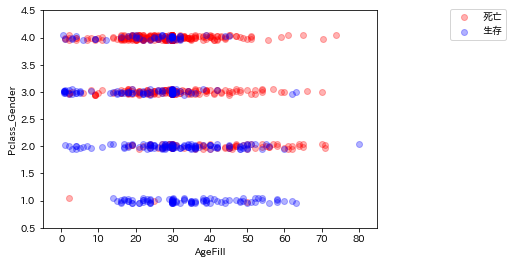

In [51]:
np.random.seed = 0

xmin, xmax = -5, 85
ymin, ymax = 0.5, 4.5

index_survived = titanic_df[titanic_df["Survived"]==0].index
index_notsurvived = titanic_df[titanic_df["Survived"]==1].index

from matplotlib.colors import ListedColormap
fig, ax = plt.subplots()
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
sc = ax.scatter(titanic_df.loc[index_survived, 'AgeFill'],
                titanic_df.loc[index_survived, 'Pclass_Gender']+(np.random.rand(len(index_survived))-0.5)*0.1,
                color='r', label='死亡', alpha=0.3)
sc = ax.scatter(titanic_df.loc[index_notsurvived, 'AgeFill'],
                titanic_df.loc[index_notsurvived, 'Pclass_Gender']+(np.random.rand(len(index_notsurvived))-0.5)*0.1,
                color='b', label='生存', alpha=0.3)
ax.set_xlabel('AgeFill')
ax.set_ylabel('Pclass_Gender')
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.legend(bbox_to_anchor=(1.4, 1.03))

- 上記のプロット図から社会的階級の高い女性(Pclass_Gender:`1.0`)は全年齢にわたって生き残り易いということが読み取れ、当初の仮説は正しかったことが検証できた。

### 決定境界を求める

In [52]:
# 運賃だけのリストを作成
data2 = titanic_df.loc[:, ["AgeFill", "Pclass_Gender"]].values
data2

array([[22.        ,  4.        ],
       [38.        ,  1.        ],
       [26.        ,  3.        ],
       ...,
       [29.69911765,  3.        ],
       [26.        ,  2.        ],
       [32.        ,  4.        ]])

In [53]:
# 生死フラグのみのリストを作成
#label2 =  titanic_df.loc[:,["Survived"]].values
label2 =  titanic_df.loc[:, 'Survived'].values
label2

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [54]:
model2 = LogisticRegression()

In [55]:
model2.fit(data2, label2)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [56]:
model2.predict([[10,1]])

array([1], dtype=int64)

In [57]:
model2.predict_proba([[10,1]])

array([[0.06072391, 0.93927609]])

In [58]:
titanic_df.head(3)

,Survived,SibSp,Parch,Fare,Embarked,AgeFill,Pclass_Gender
0,0,1,0,7.2500,S,22.0,4
1,1,1,0,71.2833,C,38.0,1
2,1,0,0,7.9250,S,26.0,3


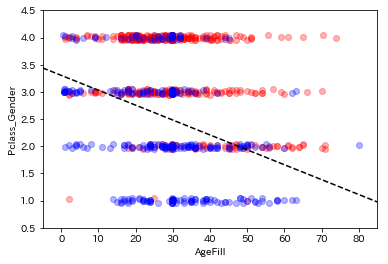

In [59]:
h = 0.02
xmin, xmax = -5, 85
ymin, ymax = 0.5, 4.5
xx, yy = np.meshgrid(np.arange(xmin, xmax, h), np.arange(ymin, ymax, h))
Z = model2.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

fig, ax = plt.subplots()
levels = np.linspace(0, 1.0)
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
#contour = ax.contourf(xx, yy, Z, cmap=cm, levels=levels, alpha=0.5)

sc = ax.scatter(titanic_df.loc[index_survived, 'AgeFill'],
                titanic_df.loc[index_survived, 'Pclass_Gender']+(np.random.rand(len(index_survived))-0.5)*0.1,
                color='r', label='死亡', alpha=0.3)
sc = ax.scatter(titanic_df.loc[index_notsurvived, 'AgeFill'],
                titanic_df.loc[index_notsurvived, 'Pclass_Gender']+(np.random.rand(len(index_notsurvived))-0.5)*0.1,
                color='b', label='生存', alpha=0.3)

ax.set_xlabel('AgeFill')
ax.set_ylabel('Pclass_Gender')
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
#fig.colorbar(contour)

x1 = xmin
x2 = xmax
y1 = -1*(model2.intercept_[0]+model2.coef_[0][0]*xmin)/model2.coef_[0][1]
y2 = -1*(model2.intercept_[0]+model2.coef_[0][0]*xmax)/model2.coef_[0][1]
ax.plot([x1, x2] ,[y1, y2], 'k--')

### 課題
年齢が`30`歳で男（`1`）の乗客は生き残れるか？

In [60]:
# titanic data csvファイルの読み込み
titanic_df = pd.read_csv('./study_ai_ml/data/titanic_train.csv')
# Ageカラムのnullを平均値で補完したAgeFillカラムを追加
titanic_df['AgeFill'] = titanic_df['Age'].fillna(titanic_df['Age'].mean())
# 性別カラムを元に、female=0、male=1の整数で表現したGenderカラムを追加
titanic_df['Gender'] = titanic_df['Sex'].map({'female': 0, 'male': 1}).astype(int)
# 列挙した予測に使用するもの以外のカラムはドロップ
usable_keys = ['Survived', 'AgeFill', 'Gender']
unusable_keys = [x for x in titanic_df.columns.values if not x in usable_keys]
titanic_df.drop(unusable_keys, axis=1, inplace=True)
# 加工済みデータを表示
titanic_df.head()

,Survived,AgeFill,Gender
0,0,22.0,1
1,1,38.0,0
2,1,26.0,0
3,1,35.0,0
4,0,35.0,1


In [61]:
from sklearn.linear_model import LogisticRegression
# 年齢と性別のリストを作成
data3 = titanic_df.loc[:, ['AgeFill', 'Gender']].values
# 生死フラグのみのリストを作成
label3 =  titanic_df.loc[:, 'Survived'].values
# 学習
model3 = LogisticRegression()
model3.fit(data3, label3)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [62]:
# 年齢が30歳で男の乗客を説明変数に指定
vec_x = np.array([30.0, 1])
vec_x

array([30.,  1.])

- **シグモイド関数**
    - 入力値$x$はスカラー
    - 出力値$\sigma(\cdot)$は必ず0から1迄の連続値になる∴クラス1に分類される**確率として表現可能**
    - ゲイン$a$の値に応じてシグモイド関数の形が変わる
        - 通常は$a=1$
        - $a=\infty$の場合、形がステップ関数と等しくなる
    - 単調増加関数
$$\sigma(x) = \frac{1}{1 + \exp(-ax)}$$

In [63]:
def sigmoid(x: float, gain: float=1.0) -> float:
    """シグモイド関数
    
    Extended description of function.
    
    Parameters
    ----------
    x : float
        入力値を指定します。
    gain : float
        ゲインを指定します。（初期値: 1.0）
        例えば、float('inf') と指定すると関数の振舞がステップ関数になります。
    Returns
    -------
    float
        0.0から1.0迄の連続値を出力します。非数は0.0と看做します。
    """
    sigma = 1 / (1 + np.exp(-gain*x))
    # 非数は0.0と看做す
    return 0.0 if np.isnan(sigma) else sigma

help(sigmoid)

Help on function sigmoid in module __main__:

sigmoid(x:float, gain:float=1.0) -> float
    シグモイド関数
    
    Extended description of function.
    
    Parameters
    ----------
    x : float
        入力値を指定します。
    gain : float
        ゲインを指定します。（初期値: 1.0）
        例えば、float('inf') と指定すると関数の振舞がステップ関数になります。
    Returns
    -------
    float
        0.0から1.0迄の連続値を出力します。非数は0.0と看做します。



- パラメータ$\boldsymbol{w}$と説明変数$\boldsymbol{x}$の線形結合をシグモイド関数$\sigma(\cdot)$に入力
$$\sigma\left(\sum_{j=1}^mw_jx_j + w_0\right)$$
- 説明変数$\boldsymbol{x}$が与えられた際に$Y=1$となる確率
$$P(Y=1\mid \boldsymbol{x})$$
    - シグモイド関数と対応
$$P(Y=1\mid \boldsymbol{x}) = \sigma\left(\sum_{j=1}^mw_jx_j + w_0\right)$$
- クラス0かクラス1への分類は**ベルヌーイ分布**に準拠
    - **説明変数$\boldsymbol{x}$が与えられた際に$Y=\{0,1\}$となる確率のベクトル**
$$
\boldsymbol{y}_{proba}
=
\begin{pmatrix}
P(Y=0\mid \boldsymbol{x}) \\
P(Y=1\mid \boldsymbol{x})
\end{pmatrix}
=
\begin{pmatrix}
1 - \sigma\left(\sum_{j=1}^mw_jx_j + w_0\right) \\
\sigma\left(\sum_{j=1}^mw_jx_j + w_0\right)
\end{pmatrix}
$$

In [64]:
# パラメータと説明変数の線形結合をシグモイド関数に入力
proba = sigmoid(model3.coef_ @ vec_x + model3.intercept_)[0]
proba

0.19335941158954045

In [65]:
# 乗客の生死の確率を予測
# model3.predict_proba([vec_x])[0] と等価
vec_y_proba = np.array([1 - proba, proba])
vec_y_proba

array([0.80664059, 0.19335941])

In [66]:
print('死亡率:', '{:.0%}'.format(vec_y_proba[0]))
print('生存率:', '{:.0%}'.format(vec_y_proba[1]))
print('∴ 年齢が{age:d}歳で{gender:s}の乗客は生き残れ{pon:s}たと推定されます。'.format( \
                                            age=int(vec_x[0]), \
                                            gender='男' if vec_x[1] == 1 else '女', \
                                            pon='' if vec_y_proba.argmax() == 1 else 'なかっ'))

死亡率: 81%
生存率: 19%
∴ 年齢が30歳で男の乗客は生き残れなかったと推定されます。


## 主成分分析
- 設定
    - 乳がん検査データを利用しロジシティック回帰モデルを作成
    - 主成分を利用し2次元空間上に次元圧縮
- 課題
    - 32次元のデータを2次元上に次元圧縮した際に、うまく判別できるかを確認

|||
|:-:|:-:|
|データセット名|乳がん検査データ|
|レコード数|569|
|カラム数|33|
|詳細|scikit-learn|
|備考||

In [67]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

In [68]:
cancer_df = pd.read_csv('./study_ai_ml/data/cancer.csv')

In [69]:
print('cancer df shape: {}'.format(cancer_df.shape))

cancer df shape: (569, 33)


In [70]:
cancer_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,...,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890,NaN
1,842517,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,...,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902,NaN
2,84300903,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,...,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758,NaN
3,84348301,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,...,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300,NaN
4,84358402,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,...,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678,NaN
5,843786,M,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,...,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440,NaN
6,844359,M,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,...,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368,NaN
7,84458202,M,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,...,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510,NaN
8,844981,M,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,...,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720,NaN
9,84501001,M,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,...,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750,NaN


In [71]:
# 不要と考えられるカラムをドロップ
cancer_df.drop('Unnamed: 32', axis=1, inplace=True)
cancer_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890
1,842517,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
2,84300903,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758
3,84348301,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300
4,84358402,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
5,843786,M,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
6,844359,M,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
7,84458202,M,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
8,844981,M,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
9,84501001,M,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,...,15.090,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750


- diagnosis: 診断結果 (良性がB / 悪性がM)
- 説明変数は3列以降、目的変数を2列目としロジスティック回帰で分類

In [72]:
# 目的変数の抽出
# 但し、元データ'M'を1、それ以外を0の整数に変換
y = cancer_df.diagnosis.apply(lambda d: 1 if d == 'M' else 0)
y

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     0
20     0
21     0
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
      ..
539    0
540    0
541    0
542    0
543    0
544    0
545    0
546    0
547    0
548    0
549    0
550    0
551    0
552    0
553    0
554    0
555    0
556    0
557    0
558    0
559    0
560    0
561    0
562    1
563    1
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [73]:
# 説明変数の抽出
X = cancer_df.loc[:, 'radius_mean':]
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890
1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
2,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758
3,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300
4,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
5,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,0.2087,0.07613,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
6,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,0.1794,0.05742,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
7,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,0.2196,0.07451,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
8,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,0.2350,0.07389,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
9,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,0.2030,0.08243,...,15.090,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750


In [74]:
# 学習用とテスト用でデータを分離
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 標準化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ロジスティック回帰で学習
logistic = LogisticRegressionCV(cv=10, random_state=0)
logistic.fit(X_train_scaled, y_train)

# 検証
print('Train score: {:.3f}'.format(logistic.score(X_train_scaled, y_train)))
print('Test score: {:.3f}'.format(logistic.score(X_test_scaled, y_test)))
print('Confustion matrix:\n{}'.format(confusion_matrix(y_true=y_test, y_pred=logistic.predict(X_test_scaled))))

Train score: 0.988
Test score: 0.972
Confustion matrix:
[[89  1]
 [ 3 50]]


- 検証スコア97%(`Test score: 0.972`)で分類できることを確認した

<BarContainer object of 30 artists>

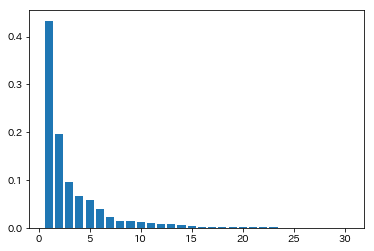

In [75]:
# 30次元データを30個の主成分で次元圧縮した際
# 各々の軸が持つ情報量の大きさを可視化
pca = PCA(n_components=30)
pca.fit(X_train_scaled)
plt.bar([n for n in range(1, len(pca.explained_variance_ratio_)+1)], pca.explained_variance_ratio_)

- 第1主成分と第2主成分を合わせた情報量が元の約60％を維持していると考えられる。

X_train_pca shape: (426, 2)
explained variance ratio: [0.43315126 0.19586506]


Text(0,0.5,'PC 2')

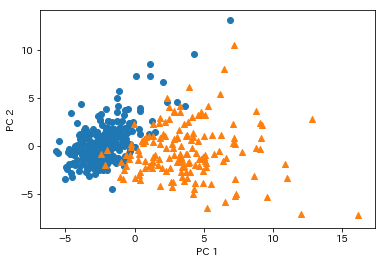

In [76]:
# PCA
# 次元数2まで圧縮
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
print('X_train_pca shape: {}'.format(X_train_pca.shape))
# X_train_pca shape: (426, 2)

# 寄与率
print('explained variance ratio: {}'.format(pca.explained_variance_ratio_))
# explained variance ratio: [ 0.43315126  0.19586506]

# 散布図にプロット
temp = pd.DataFrame(X_train_pca)
temp['Outcome'] = y_train.values
b = temp[temp['Outcome'] == 0]
m = temp[temp['Outcome'] == 1]
plt.scatter(x=b[0], y=b[1], marker='o') # 良性は○でマーク
plt.scatter(x=m[0], y=m[1], marker='^') # 悪性は△でマーク
plt.xlabel('PC 1') # 第1主成分をx軸
plt.ylabel('PC 2') # 第2主成分をy軸

- 今回の場合、実際は最初にロジスティック回帰で学習した検証スコア97%で分類できるモデルを用いる。主成分分析モデルは、データの可視化の際に用いる。

## k近傍法（k-NN）
<!--
- ハンズオン設定
    - 人口データを分類
    - 配布済みのjupyter notebookを利用
- 課題
    - 人口データと分析結果をプロットしてください

|||
|:-:|:-:|
|データセット名|人口データ|
|レコード数||
|カラム数||
|詳細||
|備考||

-->

In [77]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

### 訓練データ生成

In [78]:
def gen_data():
    x0 = np.random.normal(size=50).reshape(-1, 2) - 1
    x1 = np.random.normal(size=50).reshape(-1, 2) + 1.
    x_train = np.concatenate([x0, x1])
    y_train = np.concatenate([np.zeros(25), np.ones(25)]).astype(np.int)
    return x_train, y_train

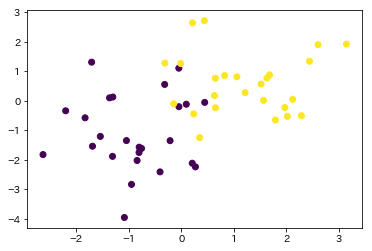

In [79]:
X_train, ys_train = gen_data()
plt.scatter(X_train[:, 0], X_train[:, 1], c=ys_train)

### 学習

- 陽に訓練ステップはない

### 予測

- 予測するデータ点との、距離が最も近い$k$個の、訓練データのラベルの最頻値を割り当てる。

In [80]:
def distance(x1, x2):
    return np.sum((x1 - x2)**2, axis=1)

def knc_predict(n_neighbors, x_train, y_train, X_test):
    y_pred = np.empty(len(X_test), dtype=y_train.dtype)
    for i, x in enumerate(X_test):
        distances = distance(x, X_train)
        nearest_index = distances.argsort()[:n_neighbors]
        mode, _ = stats.mode(y_train[nearest_index])
        y_pred[i] = mode
    return y_pred

def plt_resut(x_train, y_train, y_pred):
    xx0, xx1 = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
    xx = np.array([xx0, xx1]).reshape(2, -1).T
    plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
    plt.contourf(xx0, xx1, y_pred.reshape(100, 100).astype(dtype=np.float), alpha=0.2, levels=np.linspace(0, 1, 3))

In [81]:
# チューニングパラメータk
n_neighbors = 3
print('k:', n_neighbors)

k: 3


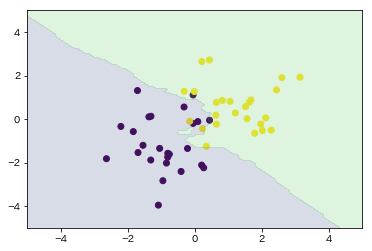

In [82]:
xx0, xx1 = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
X_test = np.array([xx0, xx1]).reshape(2, -1).T

y_pred = knc_predict(n_neighbors, X_train, ys_train, X_test)
plt_resut(X_train, ys_train, y_pred)

### scikit-learnで実装

In [83]:
# チューニングパラメータk
n_neighbors = 3
print('k:', n_neighbors)

k: 3


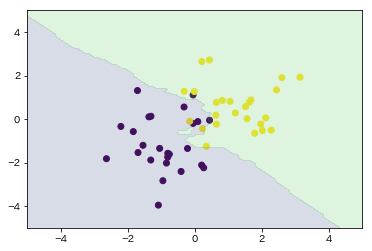

In [84]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train, ys_train)
plt_resut(X_train, ys_train, knc.predict(X_test))

## k平均法（k-means）
- クラスタリング

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import cluster, preprocessing, datasets

from sklearn.cluster import KMeans

In [86]:
wine = datasets.load_wine()
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [87]:
X = wine.data
X

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [88]:
X.shape

(178, 13)

In [89]:
y=wine.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [90]:
y.shape

(178,)

- 説明変数$\boldsymbol{X}$の行数と目的変数$y$の行数が一致していることを確認した

In [91]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [92]:
# チューニングパラメータk
n_clusters = 3
print('k:', n_clusters)

k: 3


In [93]:
model = KMeans(n_clusters=n_clusters)

In [94]:
labels = model.fit_predict(X)
labels

array([1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 0, 0, 2,
       0, 0, 2, 2, 2, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0])

In [95]:
df = pd.DataFrame({'labels': labels})
type(df)

pandas.core.frame.DataFrame

In [96]:
def species_label(theta):
    if theta == 0:
        return wine.target_names[0]
    if theta == 1:
        return wine.target_names[1]
    if theta == 2:
        return wine.target_names[2]

In [97]:
df['species'] = [species_label(theta) for theta in wine.target]

In [98]:
pd.crosstab(df['labels'], df['species'])

species,class_0,class_1,class_2
labels,,,
0,0,50,19
1,46,1,0
2,13,20,29
